# 🧪 BLG-307 YAPAY ZEKA SİSTEMLERİ - GENETİK ALGORİTMA PROJESİ
## Senaryo 5: Kimya Tesisinde Reaksiyon Süresi ve Sıcaklık Optimizasyonu

**Amaç:** Genetik Algoritma (GA) kullanarak, belirli üretim kısıtları altında reaksiyon verimini ($y$) maksimize etmek.

---

[Mustafa Umut Avcı]
[2212721045]
**GitHub Repo Bağlantısı:** [https://github.com/mustafavcii/kimya-tesisi-genetik-optimizasyon]

Kimyasal üretimde reaksiyon süresi ve sıcaklık ayarı sonucu verimi etkiliyor.
• Amaç fonksiyonu:
y = 8x₁ + 3x₂ - x₁x₂ + x₁² (reaksiyon verimi)
• Değişkenler:
o x₁: Reaksiyon süresi (dk) → [10, 60]
o x₂: Sıcaklık (°C) → [40, 120]
• Kısıtlar:
o x₁ + x₂ ≤ 140
o x₂ ≥ 60

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

# ===============================================
# 1. GENETİK ALGORİTMA PARAMETRELERİ
# ===============================================
POP_SIZE = 100        # Popülasyon Büyüklüğü (Birey Sayısı)
MAX_GEN = 200         # Maksimum Nesil Sayısı (Döngü)
P_CROSSOVER = 0.9     # Çaprazlama Olasılığı (%90)
P_MUTATION = 0.1      # Mutasyon Olasılığı (%10)
PENALTY_R = 100000    # Ceza Katsayısı (Kısıt ihlali durumunda uygulanacak ağırlık)

# ===============================================
# 2. PROBLEMİN DEĞİŞKEN SINIRLARI (Senaryo 5)
# ===============================================
# x₁: Reaksiyon süresi (dk) -> [10, 60]
X1_MIN, X1_MAX = 10, 60

# x₂: Sıcaklık (°C) -> [40, 120]
# ANCAK: Problemde x₂ ≥ 60 kısıtı olduğu için alt sınır 60 olarak güncellenmiştir.
X2_MIN, X2_MAX = 60, 120

## 1. Amaç ve Uygunluk Fonksiyonu
## 1. Amaç ve Uygunluk (Fitness) Fonksiyonu Tanımı

Bu bölümde problemin matematiksel modeli kodlanmıştır.
* **Amaç Fonksiyonu:** Verimi ($y$) hesaplar.
* **Uygunluk (Fitness) Fonksiyonu:** Kısıtları kontrol eder. Eğer $x_1 + x_2 \le 140$ kısıtı ihlal edilirse, çözüm **Cezalandırma Fonksiyonu (Penalty Function)** ile cezalandırılır ve fitness değeri düşürülür.

In [16]:
def amac_fonksiyonu(x1, x2):
    """
    Problemde verilen amaç fonksiyonu (Reaksiyon Verimi).
    Formül: y = 8x₁ + 3x₂ - x₁x₂ + x₁²
    """
    return 8 * x1 + 3 * x2 - x1 * x2 + x1**2

def uygunluk_hesapla(kromozom):
    """
    Kısıtları dikkate alarak bireyin 'Fitness' değerini hesaplar.
    """
    x1, x2 = kromozom
    y = amac_fonksiyonu(x1, x2)

    # Kısıt Kontrolü: x₁ + x₂ ≤ 140
    # Eğer toplam 140'ı geçerse, aradaki fark 'ihlal miktarı' olur.
    ihlal_miktari = max(0, x1 + x2 - 140)

    # Cezalandırma: İhlal varsa, ihlalin karesi ile büyük bir katsayı çarpılarak ceza kesilir.
    # Bu, algoritmayı kısıtlı alana zorlar.
    ceza = PENALTY_R * (ihlal_miktari ** 2)

    # Fitness = Gerçek Verim - Ceza
    fitness = y - ceza

    return fitness, y, ihlal_miktari

## 2. Genetik Operasyonlar

Popülasyonun evrimi için gerekli olan temel operatörler:
* **Popülasyon Oluşturma:** Gerçek sayı kodlaması (Real-Coded) ile rastgele bireyler üretilir.
* **Seçim (Selection):** Turnuva seçimi yöntemi ile iyi bireyler seçilir.
* **Çaprazlama (Crossover):** Aritmetik çaprazlama ile ebeveynlerden yeni yavrular üretilir.
* **Mutasyon:** Genler belirli olasılıkla rastgele değiştirilerek çeşitlilik sağlanır.

In [17]:
def populasyon_olustur():
    """Belirlenen sınırlar içinde rastgele başlangıç popülasyonu oluşturur."""
    pop = []
    for _ in range(POP_SIZE):
        x1 = random.uniform(X1_MIN, X1_MAX)
        x2 = random.uniform(X2_MIN, X2_MAX)
        pop.append((x1, x2))
    return pop

def secim_turnuva(populasyon, fitness_list, k=5):
    """Turnuva Seçimi: Rastgele seçilen k birey arasından en iyisini döndürür."""
    turnuva_indisleri = random.sample(range(POP_SIZE), k)
    en_iyi_indis = -1
    en_iyi_fitness = -np.inf

    for idx in turnuva_indisleri:
        if fitness_list[idx] > en_iyi_fitness:
            en_iyi_fitness = fitness_list[idx]
            en_iyi_indis = idx

    return populasyon[en_iyi_indis]

def caprazlama_aritmetik(ebeveyn1, ebeveyn2):
    """Aritmetik Çaprazlama: Ebeveynlerin ağırlıklı ortalaması ile yavru üretir."""
    alpha = random.random()

    # Matematiksel formül: Y = alpha * E1 + (1-alpha) * E2
    y1_x1 = alpha * ebeveyn1[0] + (1 - alpha) * ebeveyn2[0]
    y1_x2 = alpha * ebeveyn1[1] + (1 - alpha) * ebeveyn2[1]

    y2_x1 = alpha * ebeveyn2[0] + (1 - alpha) * ebeveyn1[0]
    y2_x2 = alpha * ebeveyn2[1] + (1 - alpha) * ebeveyn1[1]

    return (y1_x1, y1_x2), (y2_x1, y2_x2)

def mutasyon_uniform(kromozom):
    """Uniform Mutasyon: Geni sınırlar içinde rastgele yeni bir değerle değiştirir."""
    mutasyonlu_kromozom = list(kromozom)

    if random.random() < P_MUTATION:
        mutasyonlu_kromozom[0] = random.uniform(X1_MIN, X1_MAX)

    if random.random() < P_MUTATION:
        mutasyonlu_kromozom[1] = random.uniform(X2_MIN, X2_MAX)

    return tuple(mutasyonlu_kromozom)

## 3. Optimizasyon Süreci (Ana Döngü)

Algoritma `MAX_GEN` sayısı kadar çalışır. Her nesilde:
1.  Uygunluk hesaplanır.
2.  **Elitism** uygulanarak en iyi çözüm korunur.
3.  Seçim, Çaprazlama ve Mutasyon ile yeni nesil üretilir.

In [18]:
# Başlangıç Popülasyonu
populasyon = populasyon_olustur()

# Sonuçları tutmak için değişkenler
en_iyi_genel_cozum = None
en_iyi_genel_fitness = -np.inf
en_iyi_genel_verim = -np.inf
fitness_gecmisi = []

print(f"Genetik Algoritma Başlatılıyor... (Popülasyon: {POP_SIZE}, Nesil: {MAX_GEN})")

for nesil in range(MAX_GEN):

    # 1. Mevcut neslin değerlendirilmesi
    # Fonksiyon bize (fitness, verim, ihlal) üçlüsünü döner
    sonuclar = [uygunluk_hesapla(birey) for birey in populasyon]

    fitness_list = [s[0] for s in sonuclar]
    verim_list   = [s[1] for s in sonuclar]

    # Neslin en iyisini bul
    max_fitness_anlik = max(fitness_list)
    max_idx = fitness_list.index(max_fitness_anlik)

    # Genel en iyiyi güncelle (Elitism için sakla)
    if max_fitness_anlik > en_iyi_genel_fitness:
        en_iyi_genel_fitness = max_fitness_anlik
        en_iyi_genel_cozum = populasyon[max_idx]
        en_iyi_genel_verim = verim_list[max_idx]

    fitness_gecmisi.append(en_iyi_genel_fitness)

    # 2. Yeni Popülasyon Oluşturma
    yeni_populasyon = []

    # ELITISM: En iyi bireyi doğrudan aktar
    yeni_populasyon.append(en_iyi_genel_cozum)

    while len(yeni_populasyon) < POP_SIZE:

        # Seçim
        eb1 = secim_turnuva(populasyon, fitness_list)
        eb2 = secim_turnuva(populasyon, fitness_list)

        # Çaprazlama
        if random.random() < P_CROSSOVER:
            yavru1, yavru2 = caprazlama_aritmetik(eb1, eb2)
        else:
            yavru1, yavru2 = eb1, eb2

        # Mutasyon
        yeni_populasyon.append(mutasyon_uniform(yavru1))
        if len(yeni_populasyon) < POP_SIZE:
            yeni_populasyon.append(mutasyon_uniform(yavru2))

    populasyon = yeni_populasyon

print("Optimizasyon Tamamlandı.")

Genetik Algoritma Başlatılıyor... (Popülasyon: 100, Nesil: 200)
Optimizasyon Tamamlandı.


## 4. Sonuçların Görselleştirilmesi ve Analiz

Algoritmanın bulduğu en iyi çözüm parametreleri ve uygunluk değerinin nesillere göre değişim grafiği aşağıdadır.


                   SONUÇ RAPORU                   
1. OPTİMUM PARAMETRELER:
   - Reaksiyon Süresi (x₁): 59.9831 dk
   - Sıcaklık (x₂):         60.0169 °C
------------------------------
2. PERFORMANS:
   - Maksimum Verim (y):    657.8899
   - Fitness Değeri:        657.8899
------------------------------
3. KISIT KONTROLÜ (x₁ + x₂ ≤ 140):
   - Hesaplanan Toplam:     120.0000
   - SONUÇ: ✅ KISIT SAĞLANIYOR. Çözüm Geçerli.


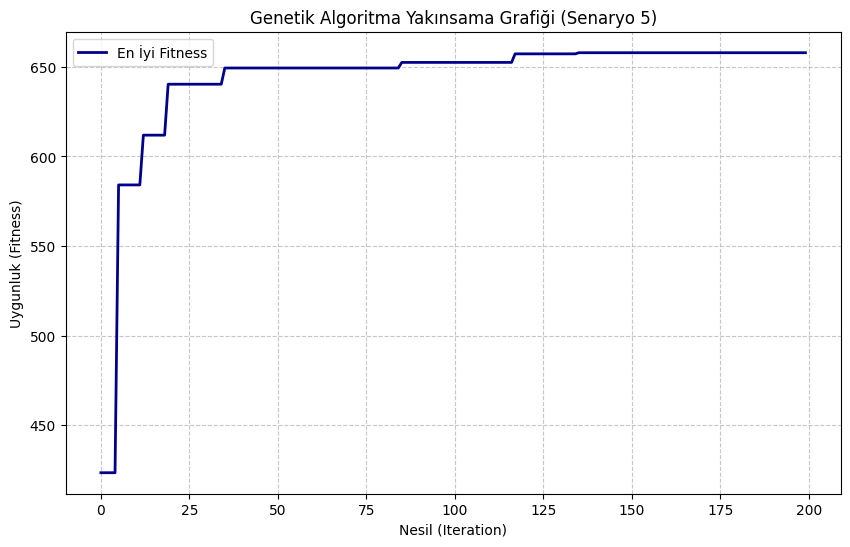

In [19]:
# ===============================================
# SONUÇ ANALİZİ VE GÖRSELLEŞTİRME
# ===============================================

print("\n" + "="*50)
print(f"{'SONUÇ RAPORU':^50}")
print("="*50)

# Değerleri Çek
opt_x1, opt_x2 = en_iyi_genel_cozum
toplam_deger = opt_x1 + opt_x2
kural_ihlal = max(0, toplam_deger - 140)

print(f"1. OPTİMUM PARAMETRELER:")
print(f"   - Reaksiyon Süresi (x₁): {opt_x1:.4f} dk")
print(f"   - Sıcaklık (x₂):         {opt_x2:.4f} °C")
print("-" * 30)
print(f"2. PERFORMANS:")
print(f"   - Maksimum Verim (y):    {en_iyi_genel_verim:.4f}")
print(f"   - Fitness Değeri:        {en_iyi_genel_fitness:.4f}")
print("-" * 30)
print(f"3. KISIT KONTROLÜ (x₁ + x₂ ≤ 140):")
print(f"   - Hesaplanan Toplam:     {toplam_deger:.4f}")

if kural_ihlal == 0:
    print("   - SONUÇ: ✅ KISIT SAĞLANIYOR. Çözüm Geçerli.")
else:
    print(f"   - SONUÇ: ❌ KISIT İHLAL EDİLDİ! (İhlal: {kural_ihlal:.4f})")

# GRAFİK ÇİZİMİ
plt.figure(figsize=(10, 6))
plt.plot(fitness_gecmisi, color='darkblue', linewidth=2, label='En İyi Fitness')
plt.title('Genetik Algoritma Yakınsama Grafiği (Senaryo 5)')
plt.xlabel('Nesil (Iteration)')
plt.ylabel('Uygunluk (Fitness)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()